In [17]:
from summit.utils.dataset import DataSet
from summit.utils.thompson_sampling import ThompsonSampledModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [69]:
# Generate data
n_points=10
X = np.sort(np.random.uniform(-3.,3.,(n_points,1)))
Y = np.mean(np.sin(X), axis=1) + np.random.randn(n_points)*0.05
Y = np.atleast_2d(Y).T
df = pd.DataFrame({"x": X[:,0], "y": Y[:,0]})
ds = DataSet.from_df(df)

In [70]:
# Training
samples = []
for i in range(10):
    model = ThompsonSampledModel("test_model")
    model.fit(
        ds[["x"]], ds[["y"]], n_retries=10, n_spectral_points=1500,
    )
    
    X_sample = np.linspace(-3,3,400)
    df_sample = pd.DataFrame({'x':X_sample})
    ds_sample = DataSet.from_df(df_sample)
    sample_Y = model.predict(ds_sample)
    samples.append(sample_Y)

# # Evaluate spectral sampled functions
# sample_f = lambda x: np.atleast_2d(models[i].rff(x)).T
# rmse_train_spectral[i] = rmse(
#     sample_f(inputs.to_numpy().astype("float")),
#     outputs[[v.name]].to_numpy().astype("float"),
#     mean=self.transform.output_means[v.name],
#     std=self.transform.output_stds[v.name],
# )

/Users/Kobi/Library/Caches/pypoetry/virtualenvs/summit-TfmmV07p-py3.8/lib/python3.8/site-packages/pyrff/rff.py:273: RuntimeWarning: covariance is not positive-semidefinite.
  sample_of_theta = numpy.random.multivariate_normal(mean_of_post_theta, variance_of_post_theta)


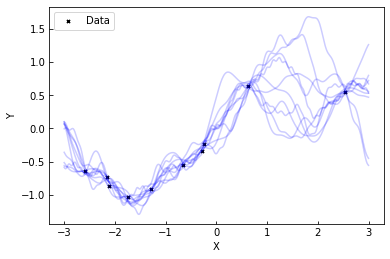

In [71]:
# X, Y, predict_Y, sample_Y = fit_and_sample()
fig, ax = plt.subplots(1)
# ax.scatter(X[:,0], predict_Y[:, 0], marker= 'o', label='GP Prediction')

for sample_Y in samples:
    ax.plot(X_sample, sample_Y, alpha=0.2, c='b')
ax.scatter(X[:,0], Y[:, 0], marker='x', s=10, c="k", label='Data')
ax.legend()
ax.tick_params(direction='in')
ax.set_xlabel('X')
_ = ax.set_ylabel('Y')